In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import tanh
from IPython.display import clear_output
from sklearn import preprocessing
from sklearn.utils import shuffle

In [9]:
from MLP import *
from gridSearch import *

In [39]:
f_target = lambda x: x**3-x**2
tx = np.sort( (2*np.random.rand(300)-1)*2 )
ty = np.array( [f_target(x)+(2*np.random.rand()-1) for x in tx ])#.reshape(1,-1)
#ty = preprocessing.normalize(ty,axis=1).reshape(-1)
tx= (tx-np.min(tx))/(np.max(tx)-np.min(tx))
tx = tx.reshape(-1,1)
ty = ty.reshape(-1,1)
#ty= (ty-np.min(ty))/(np.max(ty)-np.min(ty))

data = np.hstack((tx,ty))
data.shape

(300, 2)

17.237069472155362


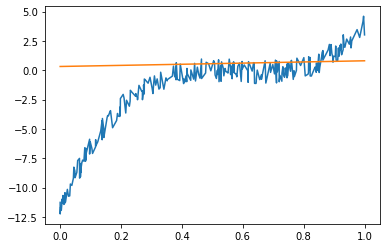

In [64]:
n = MLP(  Nh=[3], Nu=1, Ny=1, f='tanh', f_out='ide', w_scale=6 )
plt.plot(tx,ty,label='target fuction')
outs = n.supply_sequence(tx).reshape(-1)


plt.plot(tx,outs,label='network outputs')
print( MSE(outs,ty))

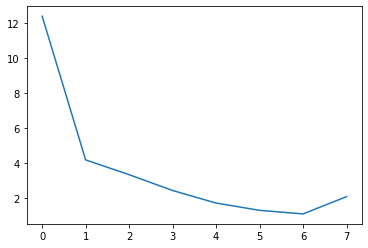

In [65]:
e, _ = n.train(tx, ty, 3e-01,
  a = 1e-02,
  l = 0,
  max_epochs = 1000,
  tresh = .1,
  epoch_f = n.epoch_batch_BP,
  measure_interval = 10 )
clear_output()
plt.plot(e)

0.4510463250832368


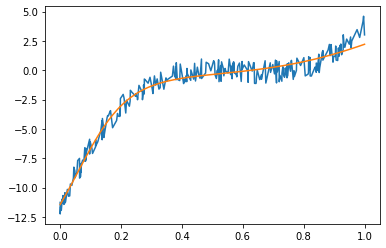

In [62]:
plt.plot(tx,ty)
outs = n.supply_sequence(tx)
outs = outs.reshape(ty.shape)
plt.plot(tx,outs.reshape(-1))
print( MSE(outs,ty))

In [ ]:
params=[
        {
         'hidden_units': [[3],[5],[10]],
         'learning_rate': [1e-01, 5e-02, 1e-02],
         'alpha': [1e-01, 1e-02, 1e-03, 0],
         'lambda' : [0],
         "weights_range": [5],
         "weights_scale": [2], # numero cifre decimali pesi
         "Nu":[1],
         "Ny":[1],
         'activation': ['tanh'],
         "f_out":['ide'],
         "loss":['squared_error'],
         "error":['MSE']
        }
      ]

def xy(set):
    return set[:,0].reshape(-1,1), set[:,1].reshape(-1,1)

k_fold_CV(data, params, k=3, n_init=1, max_epochs=1000, measure_interval=30, tresh=1,xy=xy)


# Monk test 1

In [ ]:
import pandas as pd

data = pd.read_csv('monks-1.train',sep=' ',index_col=8)
data = data.drop(columns = data.columns[0])
data = data.to_numpy()

ty = data[:100,0] ; ty = to_categorical(ty).reshape(-1,2,1)
tx = data[:100,1:]

vy = data[100:,0] ; vy = to_categorical(vy).reshape(-1,2,1)
vx = data[100:,1:]

In [ ]:
from scipy.special import softmax

n = MLP(  Nh=[100], Nu=6, Ny=2, f=relu, f_out=softmax, w_scale=.7 ,loss=cross_entropy, error=cross_entropy)
outs = n.supply_sequence(tx)
print( n.error(outs,ty))

In [ ]:
e, v = n.train(tx, ty, 5e-02,
  a = 1e-6,
  l = 1e-9,
  val_x = vx,
  val_y = vy,
  max_epochs = 1000,
  tresh = 1e-03,
  epoch_f = n.epoch_batch_BP,
  measure_interval = 10 )

plt.plot(e)
plt.plot(v)

# Monk test 2


In [ ]:
import pandas as pd
data = pd.read_csv('monks-2.train',sep=' ',index_col=8)
data = data.drop(columns = data.columns[0])
data = data.to_numpy()

ty = data[:100,0] ; ty[ty==0] = ty[ty==0]-1
tx = data[:100,1:]

vy = data[100:,0] ; vy[vy==0] = vy[vy==0]-1
vx = data[100:,1:] 

n = MLP(  Nh=[30,100], Nu=6, Ny=2, f=relu, f_out=softmax, w_scale=.7 ,loss=cross_entropy)
outs = n.supply_sequence(tx)
print( MSE(outs,ty))

e, v = n.train(tx, ty, 5e-02,
  a = 1e-6,
  l = 1e-12,
  val_x = vx,
  val_y = vy,
  max_epochs = 1000,
  tresh = 1e-03,
  epoch_f = n.epoch_batch_BP,
  measure_interval = 10 )

plt.plot(e)
plt.plot(v)